目前使用LOP為定義之實驗數據採用20筆，單變數

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

In [2]:
# TIP = pd.read_csv(os.path.join("/root/LR_ML", "0507.xlsx"))
# TIP = pd.read_excel('0507.xlsx', index_col=None)
# TIP = pd.read_csv(os.path.join('/root/LR_ML', 'Data_Sorted.csv'), error_bad_lines=False)
# os.getcwd()

In [3]:
datafile = u"/root/LR_ML/FinalData0.xlsx"
TIP0 = pd.read_excel(datafile)

In [4]:
TIP = pd.DataFrame(TIP0).drop(['No pulse', 'LOP error'],axis=1)

In [5]:
# TIP.head()

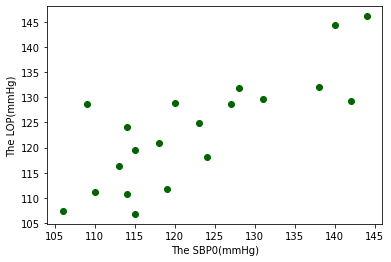

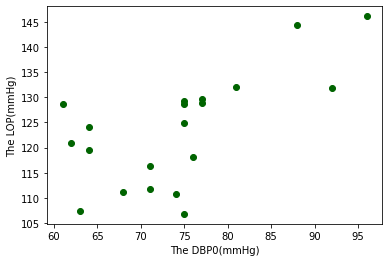

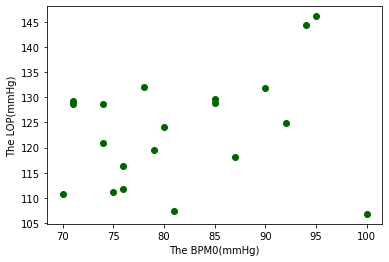

In [6]:
modTIP = TIP
#繪製散點圖,examDf.jt爲X軸，examDf.hk爲Y軸
plt.scatter(modTIP.SBP0,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
#添加圖的標籤（x軸，y軸）
plt.xlabel("The SBP0(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

plt.scatter(modTIP.DBP0,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
plt.xlabel("The DBP0(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

plt.scatter(modTIP.BPM0,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
plt.xlabel("The BPM0(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

             SBP0       DBP0        BPM0         LOP
count   20.000000  20.000000   20.000000   20.000000
mean   122.500000  74.250000   81.650000  123.555000
std     11.495995   9.640239    8.904611   11.101184
min    106.000000  61.000000   70.000000  106.800000
25%    114.000000  67.000000   74.750000  115.175000
50%    119.500000  75.000000   79.500000  124.500000
75%    128.750000  77.000000   87.750000  129.375000
max    144.000000  96.000000  100.000000  146.100000
          SBP0      DBP0      BPM0       LOP
SBP0  1.000000  0.782890  0.321083  0.796016
DBP0  0.782890  1.000000  0.604994  0.652878
BPM0  0.321083  0.604994  1.000000  0.286759
LOP   0.796016  0.652878  0.286759  1.000000


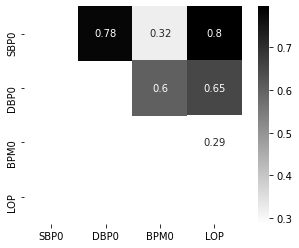

In [7]:
print(modTIP.describe())
rDf = modTIP.corr()#查看數據間的相關係數
print(rDf)
# mask = np.zeros_like(rDf, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# f, ax = plt.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(
#     rDf,          # The data to plot
#     mask=mask,     # Mask some cells
#     cmap=cmap,     # What colors to plot the heatmap as
#     annot=True,    # Should the values be plotted in the cells?
#     vmax=.3,       # The maximum value of the legend. All higher vals will be same color
#     vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
#     center=0,      # The center value of the legend. With divergent cmap, where white is
#     square=True,   # Force cells to be square
#     linewidths=.5, # Width of lines that divide cells
#     cbar_kws={"shrink": .5}  # Extra kwargs for the legend; in this case, shrink by 50%
# )
# with sns.axes_style("white"):
#     f, ax = plt.subplots(figsize=(7, 5))
#     ax = sns.heatmap(rDf, mask=mask, vmax=.3, square=True, cmap="YlGnBu")
matrix = np.tril(rDf)
H = sns.heatmap(modTIP.corr(),annot=True, cmap="gray_r", square=True, mask=matrix)
F = H.get_figure()
# F.savefig('heatmap_colored_correlation_matrix_seaborn_python.png')

In [8]:
def t_test(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1)
    std2 = np.std(group2)
    nobs1 = len(group1)
    nobs2 = len(group2)
    
    modified_std1 = np.sqrt(np.float32(nobs1)/
                    np.float32(nobs1-1)) * std1
    modified_std2 = np.sqrt(np.float32(nobs2)/
                    np.float32(nobs2-1)) * std2
    (statistic, pvalue) = stats.ttest_ind_from_stats( 
               mean1=mean1, std1=modified_std1, nobs1=nobs1,   
               mean2=mean2, std2=modified_std2, nobs2=nobs2 )
    return statistic, pvalue

In [9]:
print(t_test(modTIP.SBP0, modTIP.LOP))

print(t_test(modTIP.DBP0, modTIP.LOP))

print(t_test(modTIP.BPM0, modTIP.LOP))

print(t_test(modTIP.LOP, modTIP.LOP))

(-0.29523100606728736, 0.7694245509449147)
(-14.997116257618606, 1.5160629116917853e-17)
(-13.168548066474107, 9.735211248796108e-16)
(0.0, 1.0)


MAE: 2.373128044992317
最佳擬合線: LOP =  [29.25] + [0.77] * SBP0
R squared: 0.8802011888431641
MAE: 5.37748716252403
最佳擬合線: LOP =  [41.19] + [0.67] * SBP0
R squared: 0.9172413793103436
MAE: 8.208742383935462
最佳擬合線: LOP =  [18.81] + [0.85] * SBP0
R squared: -2.6751816443594705
MAE: 6.822688751926034
最佳擬合線: LOP =  [17.36] + [0.87] * SBP0
R squared: 0.5127481252756951
MAE: 7.119119878603939
最佳擬合線: LOP =  [41.29] + [0.67] * SBP0
R squared: 0.6841104294478529
5-fold Mean MAE: 5.980233244396357


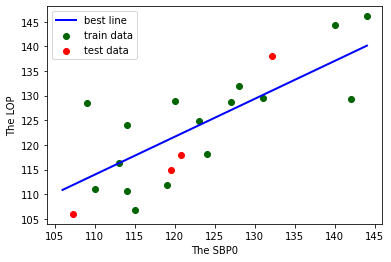

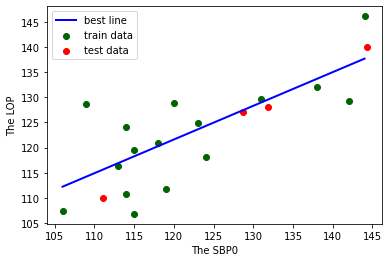

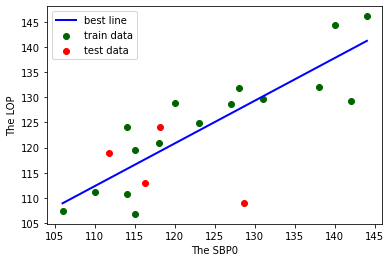

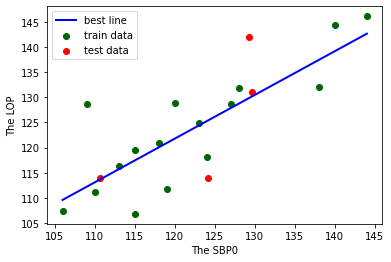

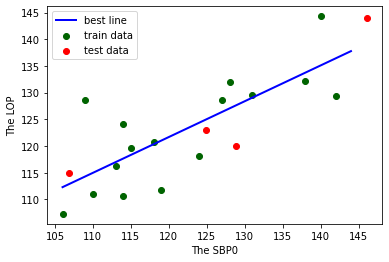

In [17]:
XX=modTIP.SBP0
YY=modTIP.LOP
qqq=np.array(XX)
qqq = np.reshape(qqq, (20,1))
qqqq=np.array(YY)
qqqq = np.reshape(qqqq, (20,1))
# cross_val_score(model, qqq, qqqq, cv=2)
# lr=LinearRegression()

# predicted = cross_val_predict(lr, qqq, qqqq, cv=5)
# fig, ax = plt.subplots()
# ax.scatter(qqqq, predicted)
# ax.plot([qqqq.min(), qqqq.max()], [qqqq.min(), qqqq.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()
# seed = 7
kfold = model_selection.KFold(n_splits=5, shuffle=False)
s = []
for train, validate in kfold.split(qqq, qqqq):
    lrr = LinearRegression()
    lrr.fit(qqq[train], qqqq[train])
    #qqqq[validate]是ground truth
    #qqq[validate]是x_test
    s.append(mean_absolute_error(qqqq[validate], lrr.predict(qqq[validate])))
    print("MAE:",mean_absolute_error(qqqq[validate], lrr.predict(qqq[validate])))
    plt.figure()
    a=lrr.intercept_
    b=lrr.coef_
    X1=np.linspace(qqq.min(),qqq.max(),18)
    Y1=np.round(a,2) + np.round(b[0],2) * X1
    print("最佳擬合線: LOP = ",np.round(a,2),"+",np.round(b[0],2),"* SBP0")
    plt.plot(X1, Y1, color='blue', linewidth=2, label="best line")
    plt.scatter(qqq[train], qqqq[train], color='darkgreen', label="train data")
    plt.scatter(qqqq[validate], qqq[validate], color='red', label="test data")
    plt.legend(loc=2)
    plt.xlabel("The SBP0")
    plt.ylabel("The LOP")
    print("R squared:",lrr.score(qqqq[validate],lrr.predict(qqq[validate])))#噴三個 R score
print("5-fold Mean MAE:",np.mean(s))#mse mean
# scoring = 'neg_mean_absolute_error'
# results = model_selection.cross_val_score(lrr, qqq, qqqq, cv=kfold, scoring=scoring)
# print("負的MAE",results.mean())

In [11]:
# print(predicted)

自變量---源數據: (20,) ；  訓練集: (16,) ；  測試集: (4,)
因變量---源數據: (20,) ；  訓練集: (16,) ；  測試集: (4,)


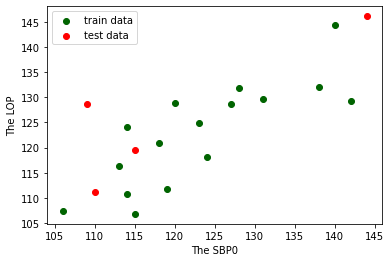

In [12]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.SBP0,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBP0.shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#散點圖
plt.scatter(X_train, Y_train, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test, Y_test, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBP0")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (20,) ；  訓練集: (16,) ；  測試集: (4,)
因變量---源數據: (20,) ；  訓練集: (16,) ；  測試集: (4,)


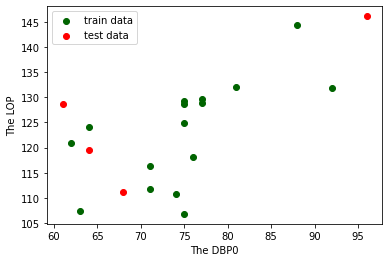

In [13]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(modTIP.DBP0,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.DBP0.shape, "；  訓練集:",X_train2.shape, "；  測試集:",X_test2.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train2.shape, "；  測試集:",Y_test2.shape)
#散點圖
plt.scatter(X_train2, Y_train2, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test2, Y_test2, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The DBP0")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (20,) ；  訓練集: (16,) ；  測試集: (4,)
因變量---源數據: (20,) ；  訓練集: (16,) ；  測試集: (4,)


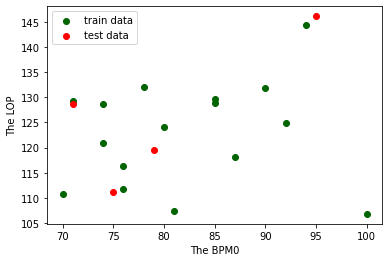

In [14]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(modTIP.BPM0,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.BPM0.shape, "；  訓練集:",X_train3.shape, "；  測試集:",X_test3.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train3.shape, "；  測試集:",Y_test3.shape)
#散點圖
plt.scatter(X_train3, Y_train3, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test3, Y_test3, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The BPM0")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

In [15]:
q = np.array(X_train)#q原先shape是(28,0)
np.shape(q)
q = np.reshape(q, (16,1))#reshape換成(28,1)
qq = np.array(X_test)
qq = np.reshape(qq, (4,1))

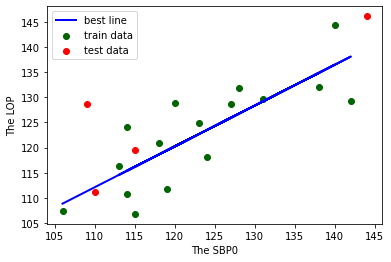

擬合參數:截距 22.714688449847998 ,迴歸係數： [0.8125076]
最佳擬合線: LOP =  22.71 + 0.81 * SBP0
0.6665793592218685
7.035915653495447


In [16]:
model = LinearRegression()
model.fit(q,Y_train)#調用線性迴歸包
# model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#迴歸係數
#訓練數據的預測值
y_train = model.predict(q)#看原本線性
y_train_pred = model.predict(qq)#預測y
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(q, y_train, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBP0")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a,",迴歸係數：",b)
print("最佳擬合線: LOP = ",round(a,2),"+",round(b[0],2),"* SBP0")
#顯示線性方程，並限制參數的小數位爲兩位
print(model.score(q,Y_train))#R score
print(mean_absolute_error(Y_test,y_train_pred))